In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import dl_toolbox.transforms as tf
import dl_toolbox.datasets as datasets

def show_dataset(dataset):
    item = dataset[0]
    image=item['image'].numpy().transpose(1,2,0)[...,:3]
    label=item['label'].numpy()
    print('max val in image :', np.max(image))
    print('max val in label :', np.max(label))
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.imshow(image)
    ax2.imshow(label)

### Testing AIRS

1.0
1


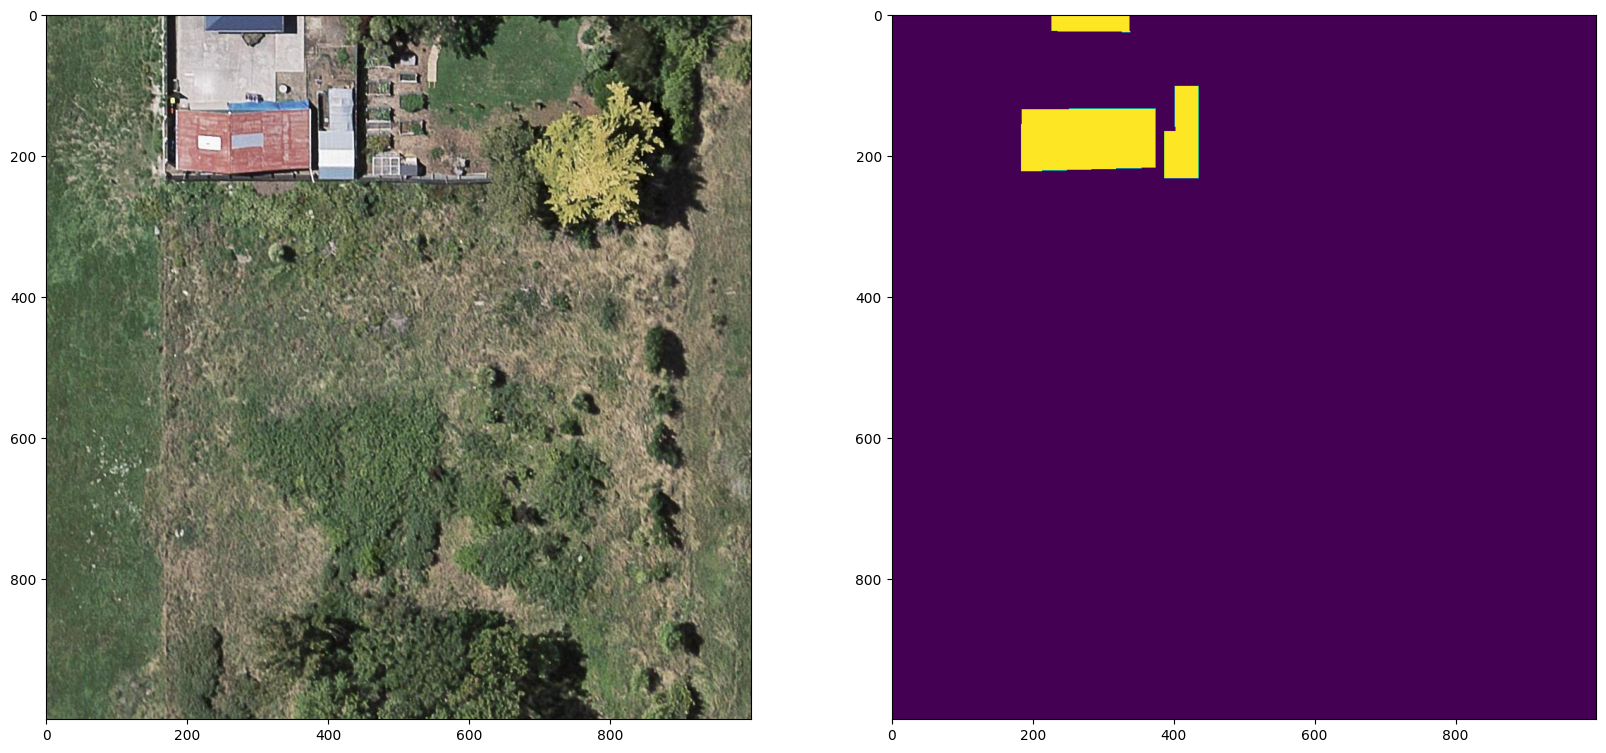

In [8]:
imgs = ['/data/AIRS/trainval/val/image/christchurch_676.tif',
        '/data/AIRS/trainval/val/image/christchurch_251.tif']
msks = ['/data/AIRS/trainval/val/label/christchurch_676.tif',
        '/data/AIRS/trainval/val/label/christchurch_251.tif']

dataset = datasets.Airs(
    imgs=imgs,
    msks=msks,
    bands=[1,2,3],
    merge='building',
    transforms=tf.StretchToMinmax(minval=[0]*3, maxval=[255.]*3),
    crop_size=1000,
    crop_step=1000,
    window=(0, 0, 10000, 10000)
)

show_dataset(dataset)

### Testing Semcity

1.0
6


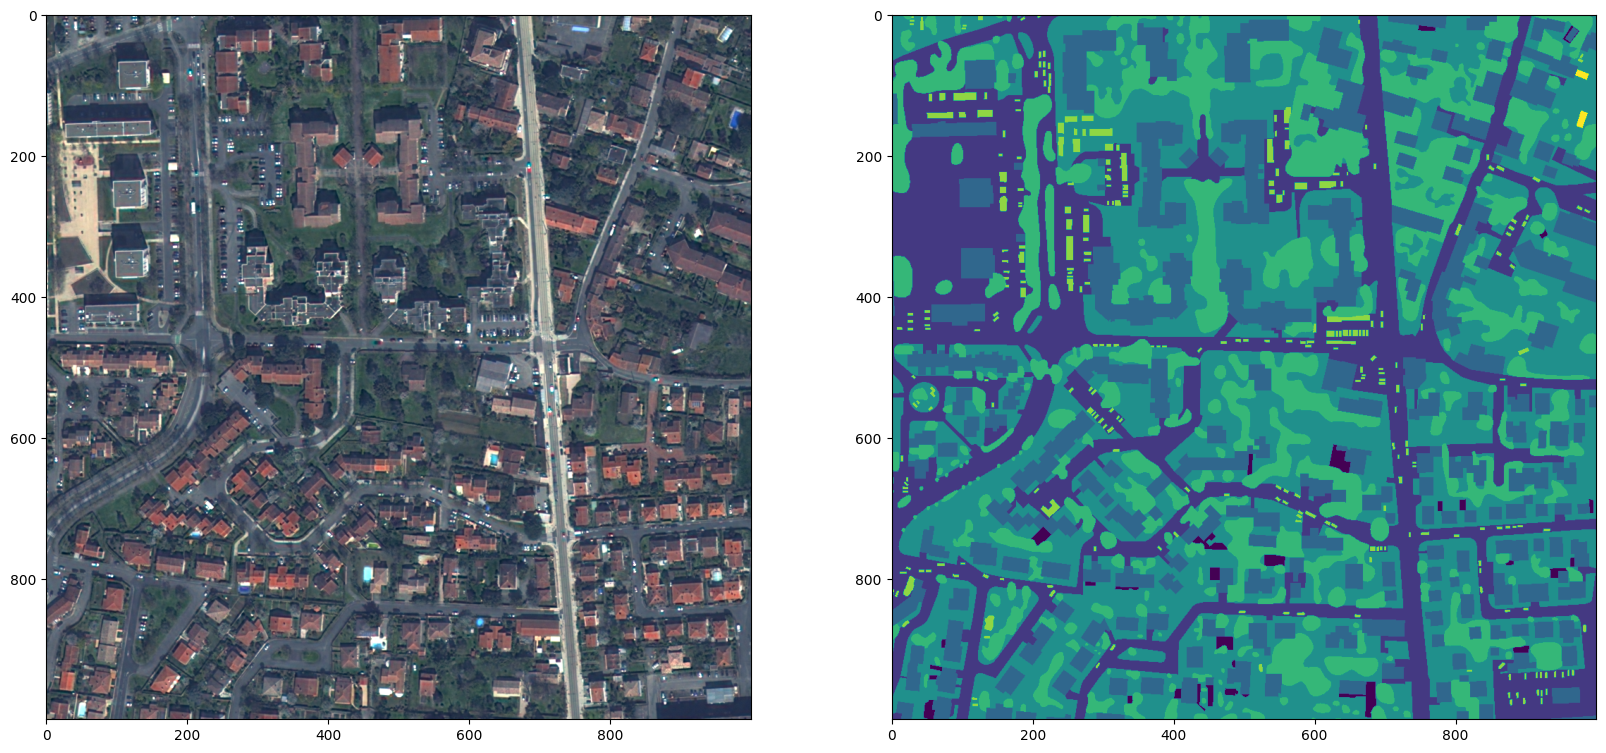

In [9]:
imgs = ['/data/SemCity-Toulouse-bench/img_multispec_05/TLS_BDSD_M/TLS_BDSD_M_01.tif']
msks = ['/data/SemCity-Toulouse-bench/semantic_05/TLS_indMap/TLS_indMap_01_1.tif']

dataset = datasets.Semcity(
    imgs=imgs,
    msks=msks,
    bands=[4,3,2],
    merge='all7',
    transforms=tf.StretchToMinmax(minval=[0]*3, maxval=[1100,1000,700]),
    crop_size=1000,
    crop_step=1000,
    window=(0, 0, 3520, 3520)
)

show_dataset(dataset)

### Testing Flair

1.0
5


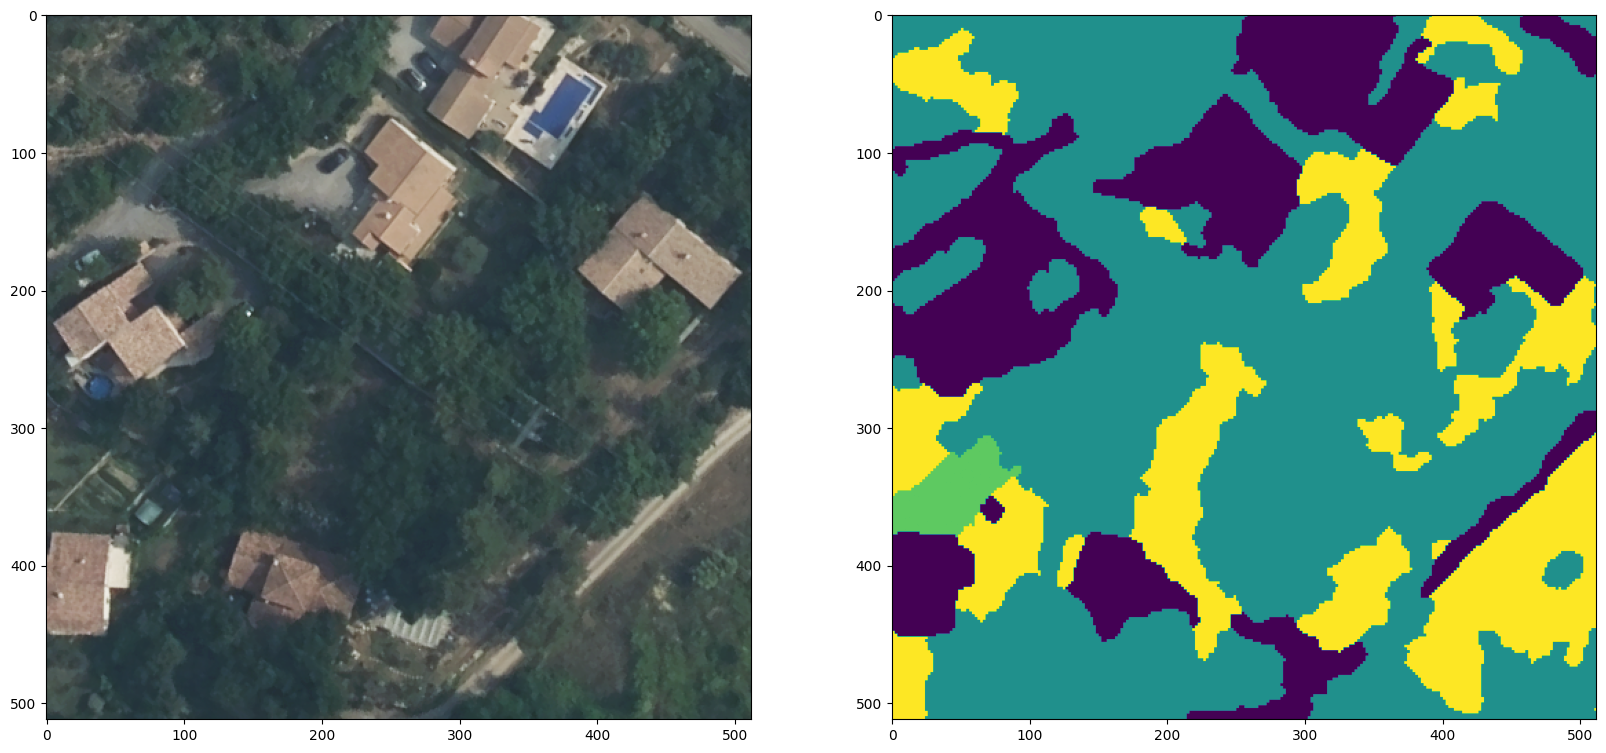

In [11]:
imgs = ['/data/FLAIR_1/train/D004_2021/Z10_AU/img/IMG_000826.tif',
        '/data/FLAIR_1/train/D004_2021/Z10_AU/img/IMG_000827.tif']
msks = ['/data/FLAIR_1/train/D004_2021/Z10_AU/msk/MSK_000826.tif',
        '/data/FLAIR_1/train/D004_2021/Z10_AU/msk/MSK_000827.tif']
     
dataset = datasets.Flair(
    imgs=imgs,
    msks=msks,
    bands=[1,2,3],
    merge='hierarchical6',
    transforms=tf.StretchToMinmax(minval=[0]*3, maxval=[255.]*3),
)

show_dataset(dataset)

### Testing cityscapes

max val in image : 1.0
max val in label : 14


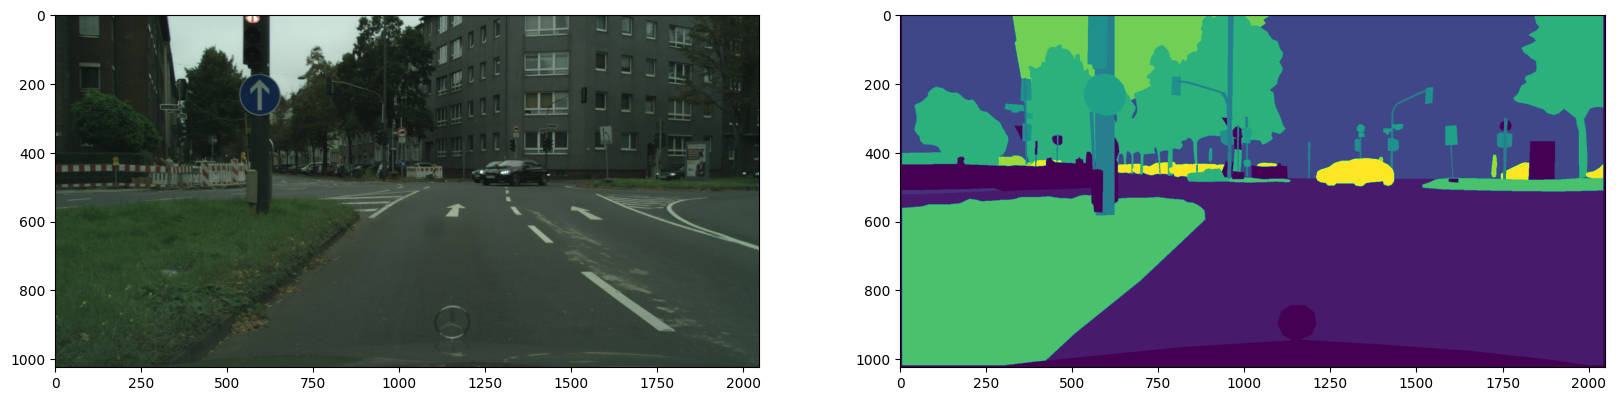

In [15]:
imgs = ['/data/Cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000000_000019_leftImg8bit.png',
        '/data/Cityscapes/leftImg8bit/train/dusseldorf/dusseldorf_000001_000019_leftImg8bit.png']
msks = ['/data/Cityscapes/gtFine/train/dusseldorf/dusseldorf_000000_000019_gtFine_labelIds.png',
        '/data/Cityscapes/gtFine/train/dusseldorf/dusseldorf_000001_000019_gtFine_labelIds.png']
     
dataset = datasets.Cityscapes(
    imgs=imgs,
    msks=msks,
    merge='all19',
    transforms=tf.StretchToMinmax(minval=[0]*3, maxval=[255.]*3),
)

show_dataset(dataset)

### Testing Resisc

/data/NWPU-RESISC45/airplane/airplane_001.jpg
1.0


Text(0.5, 1.0, 'airplane')

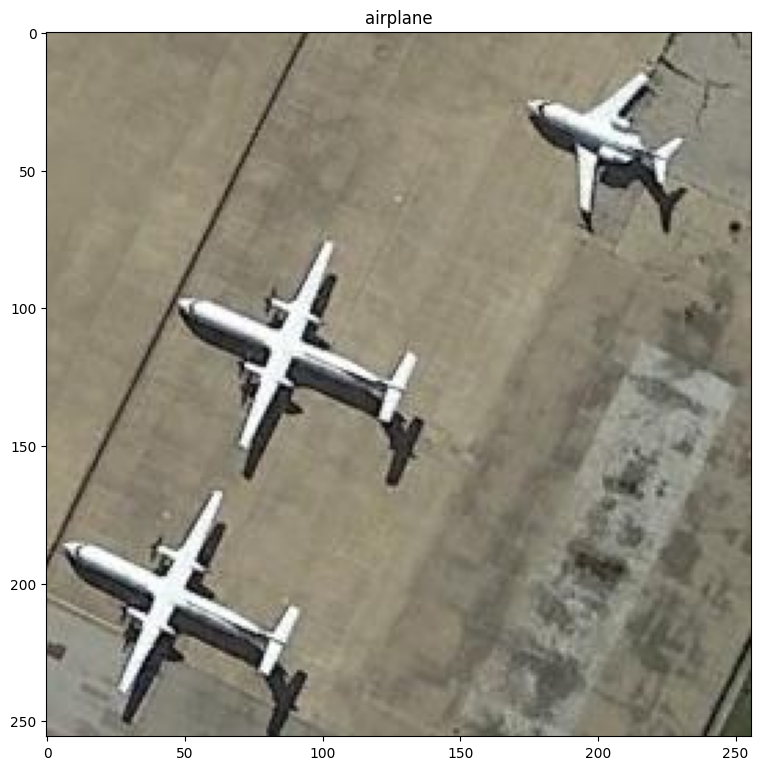

In [4]:
dataset = datasets.Resisc(
    data_path='/data/NWPU-RESISC45',
    transforms=tf.StretchToMinmax(minval=[0]*3, maxval=[255.]*3),
    merge='all45'
)

x = dataset[0]
image=x['image'].numpy().transpose(1,2,0)[...,:3]
label=int(x['label'])
print(str(x['path']))
print(np.max(image))

%matplotlib inline

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(image)
ax1.set_title(datasets.Resisc.classes['all45'].value[label].name)

### Testing Rellis-3D

In [2]:
rellis = '/data/Rellis-3D'
imgs = [rellis+'/00000/pylon_camera_node/frame000000-1581624652_750.jpg']
msks = [rellis+'/00000/pylon_camera_node_label_id/frame000000-1581624652_750.png']
     
dataset = datasets.Rellis3d(
    imgs=imgs,
    msks=msks,
    merge='all19',
    transforms=tf.StretchToMinmax(minval=[0]*3, maxval=[255.]*3),
)

show_dataset(dataset)

max val in image : 1.0
max val in label : 18


### Testing semantic drone dataset

max val in image : 1.0
max val in label : 22


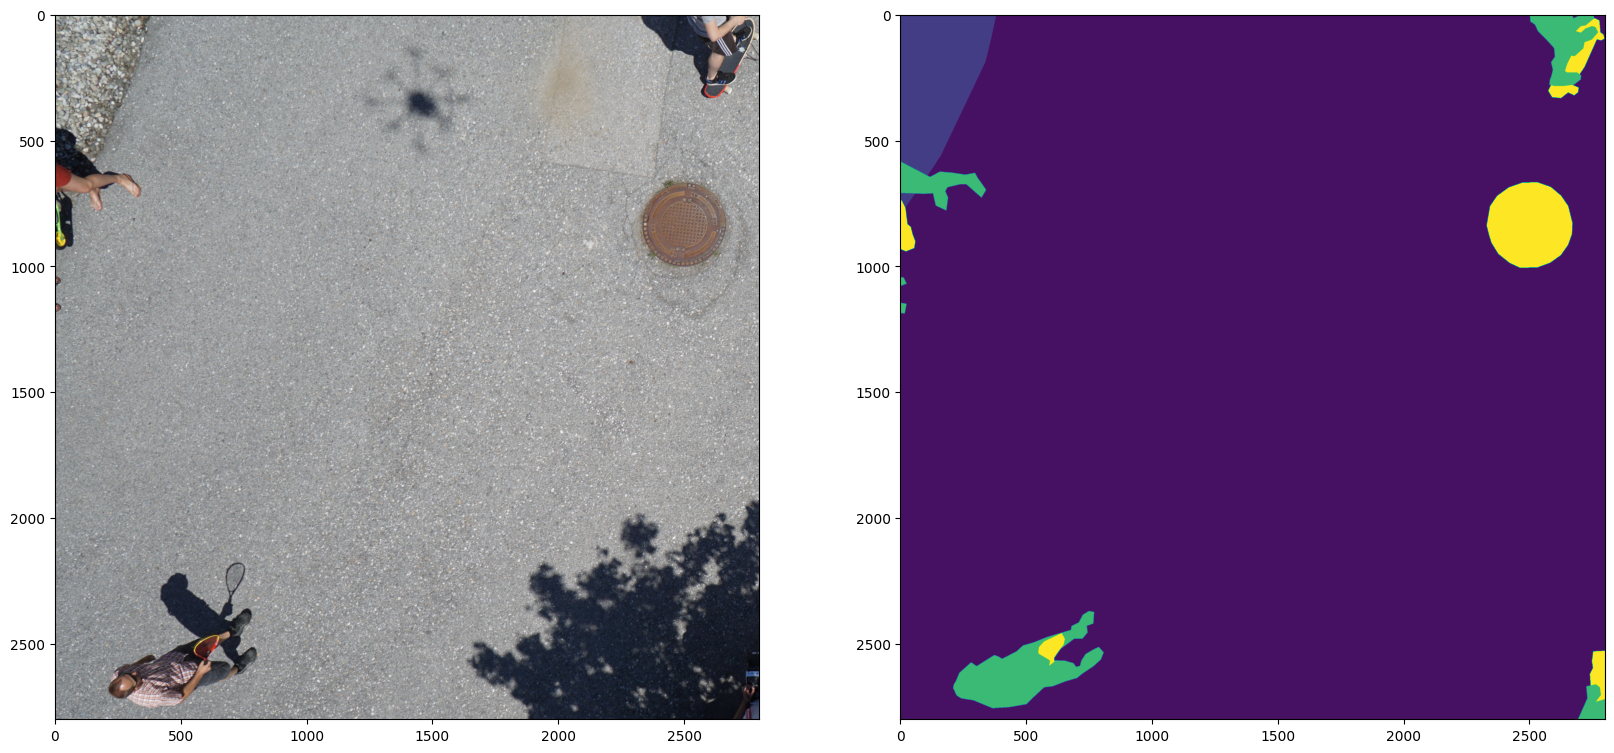

In [4]:
from pathlib import Path
ds = '/data/semantic_drone_dataset'
ds_imgs_path = Path(ds + '/training_set/images')
ds_imgs = ds_imgs_path.glob('*.jpg')
ds_imgs = sorted(ds_imgs, key=lambda x: int(x.stem))
ds_msks_path = Path(ds+'/training_set/gt/semantic/label_images')
ds_msks = ds_msks_path.glob('*.png')
ds_msks = sorted(ds_msks, key=lambda x: int(x.stem))
     
dataset = datasets.SemanticDrone(
    imgs=ds_imgs,
    msks=ds_msks,
    merge='all23',
    transforms=tf.StretchToMinmax(minval=[0]*3, maxval=[255.]*3),
)

show_dataset(dataset)

### Testing Digitanie

In [ ]:
digitanie = Path('/work/AI4GEO/data/DATA/DATASETS/DIGITANIE_v4')
toulouse = digitanie / 'TOULOUSE'
imgs = list(toulouse.glob('*16bits*.tif'))
imgs = sorted(imgs, key=lambda x: int(x.stem.split('_')[-1]))
msks = list(toulouse.glob('COS9/*.tif'))
msks = sorted(msks, key=lambda x: int(x.stem.split('_')[-2]))
     
dataset = datasets.Digitanie(
    imgs=imgs,
    msks=msks,
    bands=[1,2,3],
    merge='all9',
    transforms=transforms.RandomCrop2(size=512) #transforms.Color(bounds=(0.7, 0.7)),
)

show_dataset(dataset)

### DIGITANIE TOA

In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import dl_toolbox.transforms as transforms
from dl_toolbox.datasets import DigitanieUnlabeledToaDataset
from pathlib import Path
from dl_toolbox.utils import get_tiles
import shapely
import rasterio.windows as W
import rasterio

digitanie_toas = Path('/work/AI4GEO/data/DATA/PROCESSED/PHR/COG/16bits')
city = list(digitanie_toas.glob('TOULOUSE_2013*.tif'))[0]

city_poly = shapely.Polygon(
    [
        [359326, 4833160],
        [376735, 4842547],
        [385238, 4826271],
        [367914, 4816946],
        [359326, 4833160],
    ]
)
with rasterio.open(city, 'r') as ds:
    city_tf = ds.transform
    windows = [w[1] for w in ds.block_windows()]
#windows = [W.Window(*tile) for tile in get_tiles(
#    nols=54062,
#    nrows=55600,
#    width=2000,
#    step_w=2000,
#    row_offset=0,
#    col_offset=0,
#    cover_all=True
#)]

def is_window_in_poly(w, tf, p):
    bbox = W.bounds(w, transform=tf)
    w_poly = shapely.geometry.box(*bbox)
    return w_poly.within(p)

filtered_windows = [w for w in windows if is_window_in_poly(w,city_tf,city_poly)]

dataset = DigitanieUnlabeledToaDataset(
    toa=city,
    bands=[1,2,3],
    transforms=transforms.NoOp(), #transforms.Color(bounds=(0.7, 0.7)),
    windows=filtered_windows
)

x = dataset[0]
image=x['image'].numpy().transpose(1,2,0)[...,:3]
print(np.max(image))

%matplotlib inline

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(image)

### DIGITANIE PNEO

In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import dl_toolbox.transforms as transforms
from dl_toolbox.datasets import DigitanieSublabeledToaDataset
from pathlib import Path
from dl_toolbox.utils import get_tiles
import shapely
import rasterio.windows as W
import rasterio

digitanie = Path('/work/AI4GEO/data/DATA/DATASETS/DIGITANIE_v4')
toulouse = digitanie / 'TOULOUSE'
msks = list(toulouse.glob('COS9/*.tif'))
msks = sorted(msks, key=lambda x: int(x.stem.split('_')[-2]))

toa = Path('/work/AI4GEO/data/DATA/SENSOR/PNEO/SRP_Refined/TOULOUSE_20220919_S/ORTHOS/ORT_PN4PX-2022091939322709CP.tif')

dataset = DigitanieSublabeledToaDataset(
    toa=toa,
    msks=msks,
    merge='all9',
    bands=[1,2,3],
    transforms=transforms.NoOp(), #transforms.Color(bounds=(0.7, 0.7)),
)

x = dataset[2]
image=x['image'].numpy().transpose(1,2,0)[...,:3]
label=x['label'].numpy()
print(np.max(image))
print(np.max(label), label.shape)

%matplotlib inline

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image)
ax2.imshow(label)